## Activity 2 – Time Series Prediction with LSTM

In this activity, we will: <br>
*	LSTM Network for Regression Using The Window Method
*	LSTM Network for Regression with Time Steps


### Mount Google Drive

Mount your Google Drive on your runtime using an authorization code.

Follow the instruction on the screen to authorise Colab accessing your drive. On your Google Drive, you can access you files prepend with “/content/drive/MyDrive/”

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Problem Description 


Like the previous activity, we are going to look at the same international airline passengers prediction problem, but instead of using a Multilayer Perceptron, we will be using LSTM to solve the problem.


### Import libraries and read dataset

The following code block follows the previous activity to read the internation airline passengers problem with regression framing

In [2]:
dataset_path = '/content/drive/MyDrive/Crafting/DLP/Day 2/international-airline-passengers.csv'

In [3]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv(dataset_path, 
                     usecols=[1], engine='python',skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset.shape)

(144, 1)


### LSTM Network for Regression

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing.  We can easily normalize the dataset using the **MinMaxScaler** preprocessing class from the scikit-learn library

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

Next we split the dataset and reshape into X=t and Y=t+1

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: **[samples, time steps, features]**.  Our prepared data is in the form: [samples, features] and we are framing the problem as one time step for each sample. 

![LSTM_Window.jpg](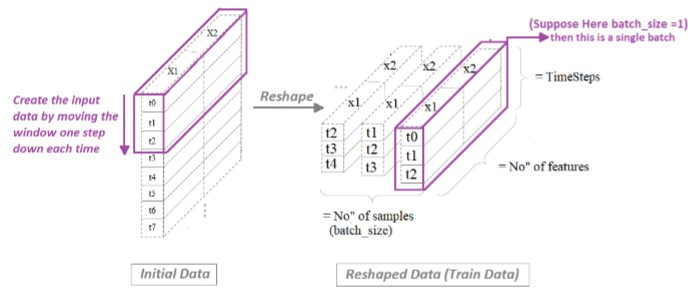 "source: https://github.com/MohammadFneish7/Keras_LSTM_Diagram")

We can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows

In [6]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print (trainX.shape)

(94, 1, 1)


We are now ready to design and fit our LSTM network for this problem. The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM memory blocks. The network is trained for 100 epochs and a batch size of 1 is used.

In [7]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 3s - loss: 0.0283
Epoch 2/100
94/94 - 0s - loss: 0.0125
Epoch 3/100
94/94 - 0s - loss: 0.0101
Epoch 4/100
94/94 - 0s - loss: 0.0092
Epoch 5/100
94/94 - 0s - loss: 0.0084
Epoch 6/100
94/94 - 0s - loss: 0.0075
Epoch 7/100
94/94 - 0s - loss: 0.0067
Epoch 8/100
94/94 - 0s - loss: 0.0059
Epoch 9/100
94/94 - 0s - loss: 0.0052
Epoch 10/100
94/94 - 0s - loss: 0.0046
Epoch 11/100
94/94 - 0s - loss: 0.0040
Epoch 12/100
94/94 - 0s - loss: 0.0035
Epoch 13/100
94/94 - 0s - loss: 0.0031
Epoch 14/100
94/94 - 0s - loss: 0.0028
Epoch 15/100
94/94 - 0s - loss: 0.0025
Epoch 16/100
94/94 - 0s - loss: 0.0024
Epoch 17/100
94/94 - 0s - loss: 0.0023
Epoch 18/100
94/94 - 0s - loss: 0.0022
Epoch 19/100
94/94 - 0s - loss: 0.0021
Epoch 20/100
94/94 - 0s - loss: 0.0021
Epoch 21/100
94/94 - 0s - loss: 0.0020
Epoch 22/100
94/94 - 0s - loss: 0.0021
Epoch 23/100
94/94 - 0s - loss: 0.0020
Epoch 24/100
94/94 - 0s - loss: 0.0020
Epoch 25/100
94/94 - 0s - loss: 0.0020
Epoch 26/100
94/94 - 0s - loss: 0.

Train Score: 23.21 RMSE
Test Score: 51.73 RMSE


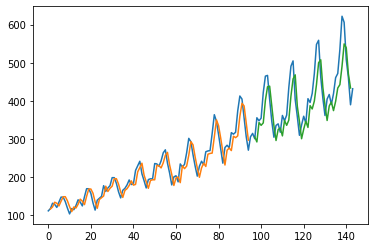

In [8]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

We can see that the model did an OK job of fitting both the training and the test datasets.   We can see that the model has an average error of about 23 passengers (in thousands) on the training dataset and about 53 passengers (in thousands) on the test dataset.

### LSTM Network for Regression Using The Window Method

We can also phrase the problem so that multiple recent time steps can be used to make the prediction for the next time step.  The create_dataset() function we created in the previous section allows us to create this formulation of the time series problem by increasing the look back argument from 1 to 3. A sample of the dataset with this formulation looks as follows: 

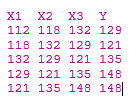

Let's restart from reading in the dataset

In [9]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv(dataset_path, 
                     usecols=[1], engine='python',skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset.shape)

(144, 1)


In [10]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

We can re-run the example in the previous section with the larger window size.  Change look_back to 3.

In [11]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

Create the LSTM, retrain, calculate RMSE and plot the predictions (refer to previous activities for necessary explanation)

trainX shape (92, 1, 3)
testX shape (44, 1, 3)
Epoch 1/100
92/92 - 1s - loss: 0.0560
Epoch 2/100
92/92 - 0s - loss: 0.0234
Epoch 3/100
92/92 - 0s - loss: 0.0160
Epoch 4/100
92/92 - 0s - loss: 0.0139
Epoch 5/100
92/92 - 0s - loss: 0.0125
Epoch 6/100
92/92 - 0s - loss: 0.0109
Epoch 7/100
92/92 - 0s - loss: 0.0096
Epoch 8/100
92/92 - 0s - loss: 0.0084
Epoch 9/100
92/92 - 0s - loss: 0.0073
Epoch 10/100
92/92 - 0s - loss: 0.0064
Epoch 11/100
92/92 - 0s - loss: 0.0058
Epoch 12/100
92/92 - 0s - loss: 0.0051
Epoch 13/100
92/92 - 0s - loss: 0.0046
Epoch 14/100
92/92 - 0s - loss: 0.0043
Epoch 15/100
92/92 - 0s - loss: 0.0039
Epoch 16/100
92/92 - 0s - loss: 0.0038
Epoch 17/100
92/92 - 0s - loss: 0.0037
Epoch 18/100
92/92 - 0s - loss: 0.0035
Epoch 19/100
92/92 - 0s - loss: 0.0035
Epoch 20/100
92/92 - 0s - loss: 0.0034
Epoch 21/100
92/92 - 0s - loss: 0.0034
Epoch 22/100
92/92 - 0s - loss: 0.0034
Epoch 23/100
92/92 - 0s - loss: 0.0033
Epoch 24/100
92/92 - 0s - loss: 0.0032
Epoch 25/100
92/92 - 0s - 

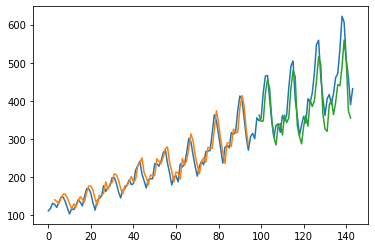

In [12]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("trainX shape",trainX.shape)
print("testX shape",testX.shape)

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

We can see that the error was increased slightly compared to that of the previous section. The window size and the network architecture were not tuned, this is just a demonstration of how to frame a prediction problem.

### LSTM Network for Regression with Time Steps

You may have noticed that the data preparation for the LSTM network includes time steps. Some sequence problems may have a varied number of time steps per sample. For example, you may have measurements of a physical machine leading up to a point of failure or a point of surge. Each incident would be a sample, the observations that lead up to the event would be the time steps and the variables observed would be the features.

Time steps provides another way to phrase our time series problem. Like above in the window example, we can take prior time steps in our time series as inputs to predict the output at the next time step.  Instead of phrasing the past observations as separate input features, we can use them as time steps of the one input feature, which is indeed a more accurate framing of the problem.

We can do this using the same data representation as in the previous window-based example, except when we reshape the data we set the columns to be the time steps dimension and change the features dimension back to 1. For example


```
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
```



You will also need to change your LSTM network to reflect this change in training dataset change. Specifically the input_shape parameter.


```
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
```



Let's restart from reading in the dataset

In [13]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv(dataset_path, 
                     usecols=[1], engine='python',skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset.shape)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#print(len(train), len(test))

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

(144, 1)


In [14]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [15]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 1s - loss: 0.0274
Epoch 2/100
92/92 - 0s - loss: 0.0100
Epoch 3/100
92/92 - 0s - loss: 0.0082
Epoch 4/100
92/92 - 0s - loss: 0.0071
Epoch 5/100
92/92 - 0s - loss: 0.0064
Epoch 6/100
92/92 - 0s - loss: 0.0056
Epoch 7/100
92/92 - 0s - loss: 0.0050
Epoch 8/100
92/92 - 0s - loss: 0.0045
Epoch 9/100
92/92 - 0s - loss: 0.0043
Epoch 10/100
92/92 - 0s - loss: 0.0041
Epoch 11/100
92/92 - 0s - loss: 0.0039
Epoch 12/100
92/92 - 0s - loss: 0.0038
Epoch 13/100
92/92 - 0s - loss: 0.0039
Epoch 14/100
92/92 - 0s - loss: 0.0037
Epoch 15/100
92/92 - 0s - loss: 0.0038
Epoch 16/100
92/92 - 0s - loss: 0.0037
Epoch 17/100
92/92 - 0s - loss: 0.0037
Epoch 18/100
92/92 - 0s - loss: 0.0037
Epoch 19/100
92/92 - 0s - loss: 0.0037
Epoch 20/100
92/92 - 0s - loss: 0.0038
Epoch 21/100
92/92 - 0s - loss: 0.0036
Epoch 22/100
92/92 - 0s - loss: 0.0036
Epoch 23/100
92/92 - 0s - loss: 0.0036
Epoch 24/100
92/92 - 0s - loss: 0.0036
Epoch 25/100
92/92 - 0s - loss: 0.0035
Epoch 26/100
92/92 - 0s - loss: 0.

Train Score: 22.80 RMSE
Test Score: 60.24 RMSE


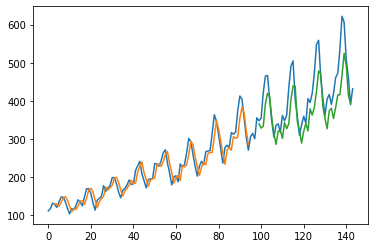

In [16]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

We can see that the results are slightly better than previous example, and the structure of the input data makes a lot more sense. 

### LSTM Network for Memory Between Batches

The LSTM network has memory which is capable of remembering across long sequences.  ***Normally, the state within the network is reset after each training batch when fitting the model, as well as each call to model.predict() or model.evaluate().***   We can gain finer control over when the internal state of the LSTM network is cleared in Keras by making the LSTM layer stateful. This means that it can build state over the entire training sequence and even maintain that state if needed to make predictions.

It requires that the training data not be shuffled when fitting the network. It also requires explicit resetting of the network state after each exposure to the training data (epoch) by calls to model.reset states(). This means that we must create our own outer loop of epochs and within each epoch call model.fit() and model.reset states(), for example:
```
for i in range(100):
  model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
  model.reset_states()
```
Finally, when the LSTM layer is constructed, ***the stateful parameter must be set to True and instead of specifying the input dimensions, we must hard code the number of samples in a batch, number of time steps in a sample and number of features in a time step by setting the batch_input_shape parameter***. For example:

```
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
```






The same batch size must then be used later when evaluating the model and making predictions.  For example:

```
trainPredict = model.predict(trainX, batch_size=batch_size)
```


Let's restart from reading in the dataset

In [17]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv(dataset_path, 
                     usecols=[1], engine='python',skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset.shape)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#print(len(train), len(test))

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

(144, 1)


In [18]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [19]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
for i in range(100):
  model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
  model.reset_states()

92/92 - 1s - loss: 0.0038
92/92 - 0s - loss: 0.0059
92/92 - 0s - loss: 0.0050
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0032
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0031
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0030
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0029
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s - loss: 0.0028
92/92 - 0s -

Train Score: 21.28 RMSE
Test Score: 69.55 RMSE


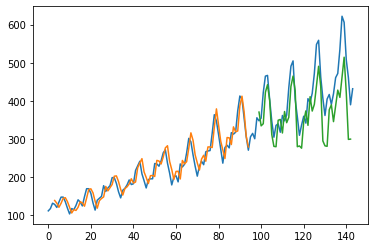

In [21]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

We do see that results are better than some, worse than others. The model may need more modules and may need to be trained for more epochs to internalize the structure of the problem.

### Stacked LSTMs Network for Memory Between Batches

Finally, we will take a look at one of the big benefits of LSTMs, the fact that they can be successfully trained when stacked into deep network architectures. LSTM networks can be stacked in Keras in the same way that other layer types can be stacked.

One addition to the configuration that is required is that an LSTM layer prior to each subsequent LSTM layer must return the sequence. This can be done by setting the return sequences parameter on the layer to True. We can extend the stateful LSTM in the previous section to have two layers, as follows:

```
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
```
Let's restart from reading in the dataset


In [22]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv(dataset_path, 
                     usecols=[1], engine='python',skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset.shape)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#print(len(train), len(test))

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print("trainX shape",trainX.shape)
print("testX shape",testX.shape)

(144, 1)
trainX shape (92, 3, 1)
testX shape (44, 3, 1)


In [23]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [24]:
for i in range(100):
  model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
  model.reset_states()

92/92 - 2s - loss: 0.0046
92/92 - 0s - loss: 0.0159
92/92 - 0s - loss: 0.0104
92/92 - 0s - loss: 0.0077
92/92 - 0s - loss: 0.0063
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0052
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0050
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s -

Train Score: 23.62 RMSE
Test Score: 90.80 RMSE


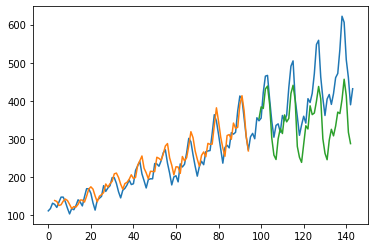

In [25]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

The predictions on the test dataset are again worse. This is more evidence to suggest the need for additional training epochs.

### Exercise

Create a time-series prediction model using the dataset "Metro_Interstate_Traffic_Volume_500.csv"

In [26]:
dataset_path = '/content/drive/MyDrive/Crafting/DLP/Day 2/Metro_Interstate_Traffic_Volume_500.csv'